# Tobigs_11th_week01_Logistic_Regression
## Assignment_2
### 원안 작성자 10기 박성진
### 과제 수행자 11기 김대웅

# 1. Dataload and import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from copy import deepcopy

In [2]:
## 본인의 디렉토리에 맞게 설정하세요 
data = pd.read_csv('../assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


In [3]:
data.shape

(200, 4)

In [4]:
data

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000
5,0,1,6.5,69000
6,0,1,7.5,76000
7,0,1,8.1,88000
8,1,1,8.7,83000
9,1,1,10.0,83000


# 2. EDA : scatter plot

In [5]:
# filter out the applicants that got admitted
MALE = data[data['Label']==1]
FEMALE = data[data['Label'] == 0]

C:\Users\wungi\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


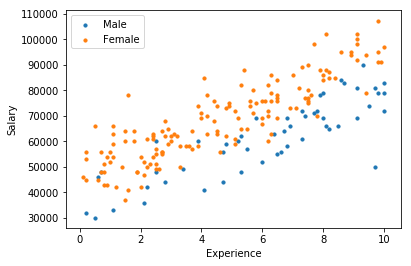

In [6]:
# plots
fig = plt.figure()
plt.scatter(MALE.iloc[:, 2], MALE.iloc[:, 3], s=10, label='Male')
plt.scatter(FEMALE.iloc[:, 2], FEMALE.iloc[:, 3], s=10, label='Female')
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Experience')
ax.set_ylabel('Salary')
plt.legend()
plt.show()

# 3. Standardizing X

In [7]:
## 독립변수들
X = data.iloc[:, 1:]

# rescaled_X 
standardized_X = (X[['experience','salary']]-X[['experience','salary']].mean())/X[['experience','salary']].std()
standardized_X['bias'] = X['bias']
cols = standardized_X.columns.tolist()


In [8]:
standardized_X

,experience,salary,bias
0,-1.509461,-1.203582,1
1,-1.088020,-1.203582,1
2,-0.877300,-0.431230,1
3,-0.280258,-0.238142,1
4,0.351903,0.598573,1
5,0.527504,0.148034,1
6,0.878705,0.598573,1
7,1.089425,1.370925,1
8,1.300146,1.049112,1
9,1.756707,1.049112,1


In [9]:
cols = cols [-1:] + cols[:-1]

In [10]:
standardized_X = standardized_X[cols]
standardized_X

,bias,experience,salary
0,1,-1.509461,-1.203582
1,1,-1.088020,-1.203582
2,1,-0.877300,-0.431230
3,1,-0.280258,-0.238142
4,1,0.351903,0.598573
5,1,0.527504,0.148034
6,1,0.878705,0.598573
7,1,1.089425,1.370925
8,1,1.300146,1.049112
9,1,1.756707,1.049112


In [11]:
standardized_X = standardized_X.values.tolist()
X= np.array(standardized_X)


#Basic_X
# X = X.values.tolist()
# X = np.array(X)
#X

# 종속변수 Target = T 
T = data['Label']
T = T.values.tolist()
T = np.array(T)
#T

# 회귀계수
beta = np.random.randn(3)
#beta= np.array([1,1,1])
#beta

# 4. MLE by GD method
- 일반적인 convex optimization에서 사용할 수 있는 알고리즘으로 Gradient descent method, Newton method, 그리고 Lagrange multiplier 등이 있다.
- 이들 중에서 Gradient descent method를 사용해 MLE를 실시해보자

## 절차
 1. 분류문제에 사용할 Logistic Regression model을 만든다.
 2. 이를 1(MALE)로 분류할 확률(P)에 대해 정리하여 로지스틱함수(P)를 만든다.
 3. Data set x가 주어졌을 때 Data set x를 생성했을 가능성이 가장 높은 모수(beta)를 찾기위해 Likelhood를 최대로 하는 값을 찾는다. 이것을 MLE(Maximum Likelhood Estimation)이라 한다.
- 3.1. GD를 적용하기 위해 loss function을 설계한다. J(B) = -log(Likelihood)
- 3.2. beta에 랜덤초기값 부여
- 3.3. 랜덤초기값의 graidient와 반대방향으로 하강 : beta = beta - alpha*J'(B)
- 3.4. 3.3.을 멈춤조건까지 반복

- cf_1. Likelhood(우도): 미지의 모수(beta)에 의해 Data set X가 발생할 확률(각 샘플 x_i의 발생확률들의 곱으로 정의)
- cf_2. (3.1.) -log(Likelihood)를 한 것은 convex function 형태를 만들어 경사하강을 하기 위함.
    
## 4.1. Logistic Regression model
## $$ \log(\frac{\mathrm{\textit{P}} }{\mathrm{1 - \textit{P}}})=B^TX = \hat{\beta}_0 +\hat{\beta}_1x_1 +\hat{\beta}_2x_2$$
## $$ \mbox 우변의\ 회귀식을\ 함수\ a_i(X, B)로\ 정의\ \\ \quad \textit{i} = 1, 2, ... , \textit{N}\  (\textit{N} = 데이터수) $$


In [16]:
# 내적 -> 회귀계수와 X의 선형결합
def a(X, beta):
    out_a = X.dot(beta)
    return out_a

## 4.2. Logistic function P
## $$ \mbox 로그오즈 = 회귀식을\  P에\  대해서\  정리 $$
## $$ \log(\frac{\mathrm{\textit{P}} }{\mathrm{1 - \textit{P}}}) = \hat{\beta}_0 +\hat{\beta}_1x_1 + \hat{\beta}_2x_2 $$
## $$ \mbox P 는 \ 로지스틱 \ 함수 $$
## $$ P = \frac{\mathrm{1} }{\mathrm{1} + e^{-a_n}} = \sigma(x,B) $$ 

In [14]:
'''
함수를 구현하세요 
INPUT: 회귀식(a)
Output: P
'''
def P(a):
    out_p = 1/(1+np.exp(-a))
    return out_p

## 4.3. MLE

### 4.3.1. Likelihood

## $$ \mbox 각\  데이터가\  따르는\  확률분포를\   label\  y와\  엮어서\  표현  $$

## $$ P(x_i,y_i | B) = \begin{cases} \sigma(x,B)^{y}, & \mbox{if }y\mbox{ = 1} \\ (1-\sigma(x,B))^{1-y}, & \mbox{if }y\mbox{ = 0} \end{cases} $$

## $$ \mbox 위의 \ 확률분포를 \ 따르는 \   데이터에서 \ 얻은 \ Likelihood  $$

## $$ L = \sigma(x,B)^{y}(1-\sigma(x,B))^{1-y} $$ 

### 4.3.2. Loss function J

## $$ \mbox log 변환  $$

## $$ L^*=log(L) = ylog\sigma(x,B) + (1-y)log(1-\sigma(x,B)) $$ 

## $$ \mbox Convex\  function으로\  만들기\  위한 \ (-) 곱   $$

## $$ \mbox J는\ Loss\ Function  $$

## $$ J= - L^* $$

## $$ \mbox Loss\ function \ = \ Negative\ log \ likelihood\  $$

## $$ \mbox N개의 \ 데이터에\ 대한\ Negative\ log \ Likelihood  $$
## $$ J(x_i,y_i|B) = \frac{\mathrm{1} }{\mathrm{N}}(-y_i\sum_{i=1}^Nlog\sigma(x_i,B)-(1-y_i)\sum_{i=1}^Nlog(1-\sigma(x_i,B))) $$ 


In [13]:
'''
Negative_Likelihood를 구현하세요
INPUT: P, Y(LABEL)
OUTPUT : 각 데이터들의 Negative log Likelihood 값의 합

'''
def J(P, Y):
    out_j = (1/len(X))*( - sum(Y*np.log(P)) - sum ((1-Y)*np.log(1-P)))
    return out_j

In [174]:
J(P(a(X, beta)), T)

0.49004074726015556

### 4.3.3. Gradient of loss function

## $$ \mbox J를 \ B에 \ 대해서\ 편미분  $$

## $$ \mbox J는 \ P에 \ 대한\ 함수이고, \ P는 \ a에 \ 대한 \ 함수이고,\ a는\ B에 \ 대한\ 함수  $$

## $${\partial J\over\partial B} =  -\sum_{i=1}^N {\partial J\over\partial P_i} {\partial P_i\over\partial a_i} {\partial a_i\over\partial B} $$ 

## $${\partial J\over\partial P_i} = -\frac{y_i}{P_i}+ \frac{1-y_i}{1-P_i} ,\quad {\partial P_i\over\partial a_i} = P_i(1-P_i), \quad {\partial a_i\over\partial B}=X^T $$ 

## $$ \mbox 또한 \ B는 \ B_0,\ B_1,\ B_2이\  있어서\ 각각\ 편미분    $$
## $$ \mbox 간단하게 \  표현하면   $$

## $${\partial J\over\partial B} =  -\sum_{i=1}^N {\partial J\over\partial P_i} {\partial P_i\over\partial a_i} {\partial a_i\over\partial B} = - X^T(y-P) =  X^T(P-y)$$ 

In [115]:
'''
위에서 구한 Negative Likelihood 함수를 각각 베타에 편미분하여 Gradient를 계산하고
Learning_rate와 곱하여 회귀계수를 업데이트 해주세요.
회귀계수가 업데이트 될 때 마다, P도 다시 업데이트 되야 합니다. 
'''

def GD(X, beta, T):
    return X.T.dot((P(a(X, beta))-T))

array([ -4.14967906, -32.75284201,  -5.27691574])

### 4.3.4. Gradient Descent

In [283]:
# INPUT : Dataset X, Label T, Learning Rate alpha
# OUTPUT : bestfit beta

alpha = 0.000001 #aplha값이 매우 작아 학습이 더디게 이루어집니다.

# 1. 초기값 설정
beta = np.random.randn(3)
# 2. repeat until i = 16770000 #최저값을 발견한 지점. 처음부터 횟수를 이렇게 지정하진 않았습니다.
i = 0
while(J(P(a(X, beta)), T) > 0):
    beta = beta - alpha*GD(X, beta, T)
    i = i +1
    if i % 10000 == 0:
        print(" %d 번째" %i)
        print(J(P(a(X, beta)), T))
    if i == 16770000:
        break

 10010000 번째
0.2873916503557738
 10020000 번째
0.28739165035529785
 10030000 번째
0.28739165035483155
 10040000 번째
0.2873916503543747
 10050000 번째
0.28739165035392683
 10060000 번째
0.2873916503534881
 10070000 번째
0.2873916503530584
 10080000 번째
0.28739165035263725
 10090000 번째
0.2873916503522245
 10100000 번째
0.2873916503518201
 10110000 번째
0.28739165035142394
 10120000 번째
0.2873916503510356
 10130000 번째
0.2873916503506553
 10140000 번째
0.2873916503502825
 10150000 번째
0.28739165034991737
 10160000 번째
0.2873916503495595
 10170000 번째
0.2873916503492088
 10180000 번째
0.2873916503488653
 10190000 번째
0.2873916503485287
 10200000 번째
0.2873916503481987
 10210000 번째
0.28739165034787556
 10220000 번째
0.2873916503475589
 10230000 번째
0.28739165034724856
 10240000 번째
0.2873916503469446
 10250000 번째
0.2873916503466466
 10260000 번째
0.2873916503463547
 10270000 번째
0.2873916503460686
 10280000 번째
0.28739165034578834
 10290000 번째
0.28739165034551384
 10300000 번째
0.28739165034524466
 10310000 번째
0.28739165034498

KeyboardInterrupt: 

In [18]:
# 최적 beta 저장
best_fit_01 = deepcopy(beta) 

NameError: name 'deepcopy' is not defined

# 5. Visualization
 - 2번의 EDA : scatterplot에 0과 1로 분류될 확률을 Gradation으로 표현하고, 0.5기준 boundary 그리기
 - 출처 : https://stackoverflow.com/questions/28256058/plotting-decision-boundary-of-logistic-regression

In [297]:
# Classifier Model 만들기
def clf(X, beta, cut_off = 0.5):
    return P(a(X, beta)) > cut_off

clf(X, beta)

array([False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
        True,  True, False, False, False, False,  True,  True, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False,  True,  True, False, False,  True,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False, False,  True,  True, False,
       False, False,

## 5.1. Classification Gradation

In [507]:
# Mash grid
xx, yy =np.mgrid[min(data.iloc[:,2])-.5:max(data.iloc[:,2])+.5:0.1,
                 min(data.iloc[:,3])-.5:max(data.iloc[:,3])+.5:0.1]

In [508]:
# Logistic function P에 넣기 위해 값을 표준화
xx_r = (xx-np.mean(xx))/np.std(xx)
yy_r = (yy-np.mean(yy))/np.std(yy)

# 각 순서쌍에 대하여 P값을 구함
grid = np.c_[np.repeat(1,len(xx_r.ravel())), xx_r.ravel(), yy_r.ravel()]
probs = P(a(grid, best_fit_01)).reshape(xx_r.shape)

[(29999.5, 107000.5), Text(0,0.5,'$X_2$'), (-0.4, 10.5), Text(0.5,0,'$X_1$')]

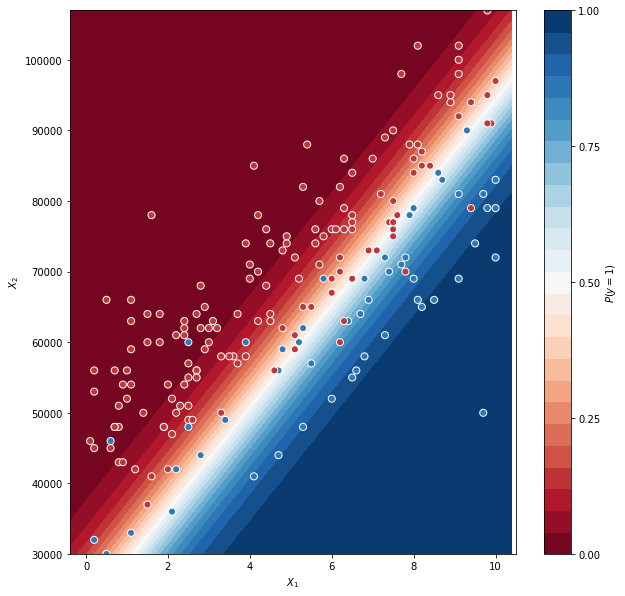

In [510]:
# grid의 각 지점에 대하여 Logistic Model의 P값을 contour로 표현
f, ax = plt.subplots(figsize=(10,10))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y=1)$")
ax_c.set_ticks([0,.25,.5, .75, 1])
ax.scatter(data.iloc[:,2], data.iloc[:,3], c=T, s=50,
          cmap = "RdBu", vmin=-.2, vmax=1.2,
          edgecolor="white", linewidth=1)
ax.set(xlim=(min(data.iloc[:,2]-.5), max(data.iloc[:,2])+.5), ylim=(min(data.iloc[:,3]-.5),max(data.iloc[:,3])+.5),
      xlabel="$X_1$", ylabel="$X_2$")

## 5.2. Classification Boundary

[(29999.5, 107000.5),
 Text(0,0.5,'salary'),
 (-0.4, 10.5),
 Text(0.5,0,'experience')]

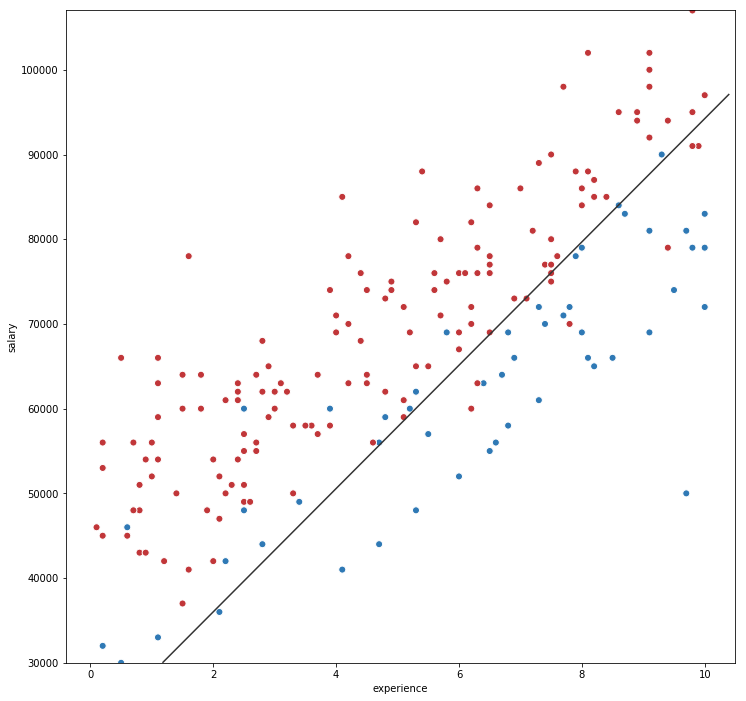

In [512]:
# 분류선 
f, ax = plt.subplots(figsize=(12,12))
ax.contour(xx, yy, probs, levels=[.5], cmap="Greys",
                      vmin=0, vmax=.6)
ax.scatter(data.iloc[:,2], data.iloc[:,3], c=T, s=50,
          cmap = "RdBu", vmin=-.2, vmax=1.2,
          edgecolor="white", linewidth=1)
ax.set(xlim=(min(data.iloc[:,2]-.5), max(data.iloc[:,2])+.5), ylim=(min(data.iloc[:,3]-.5),max(data.iloc[:,3])+.5),
      xlabel='experience', ylabel='salary')

### 아래는 데이터를 표준화한 시각화

In [354]:
# 연속형 그리드를 만들고 각각의 좌표점에 대한 확률 계산
xx, yy = np.mgrid[min(X[:,1])-.5:max(X[:,1])+.5:0.01,
                  min(X[:,2])-.5:max(X[:,2])+.5:0.01]

grid = np.c_[np.repeat(1,len(xx.ravel())), xx.ravel(), yy.ravel()]
probs = P(a(grid, best_fit_01)).reshape(xx_r.shape)
grid

array([[ 1.        , -2.22018201, -2.86211014],
       [ 1.        , -2.22018201, -2.85211014],
       [ 1.        , -2.22018201, -2.84211014],
       ...,
       [ 1.        ,  2.24981799,  3.06788986],
       [ 1.        ,  2.24981799,  3.07788986],
       [ 1.        ,  2.24981799,  3.08788986]])

[(-2.8621101378343727, 3.0938157644339297),
 Text(0,0.5,'$X_2$'),
 (-2.2201820058203, 2.2567068993697728),
 Text(0.5,0,'$X_1$'),
 None]

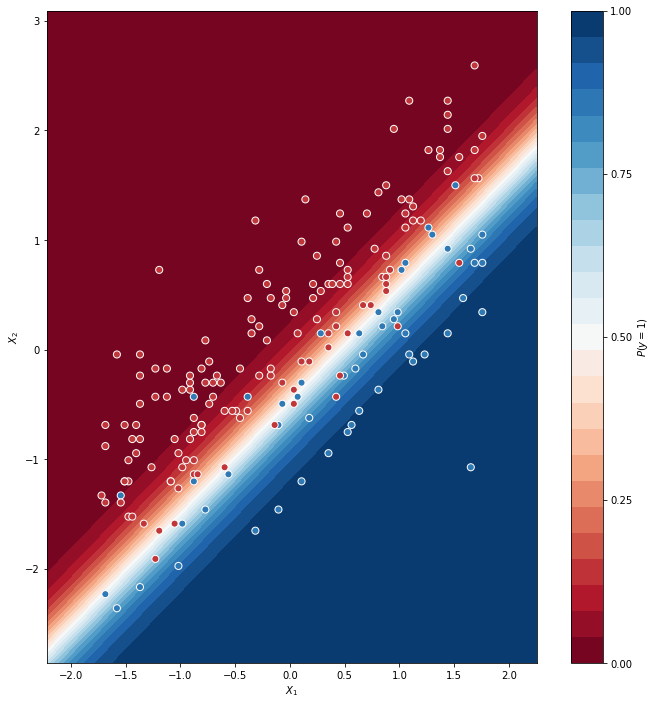

In [356]:
# grid의 각 지점에 대하여 Logistic Model의 P값을 contour로 표현
f, ax = plt.subplots(figsize=(12,12))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y=1)$")
ax_c.set_ticks([0,.25,.5, .75, 1])

ax.scatter(X[:,1], X[:,2], c=T, s=50,
          cmap = "RdBu", vmin=-.2, vmax=1.2,
          edgecolor="white", linewidth=1)
ax.set(aspect="equal",
      xlim=(min(X[:,1]-.5), max(X[:,1])+.5), ylim=(min(X[:,2]-.5),max(X[:,2])+),
      xlabel="$X_1$", ylabel="$X_2$")

[(-2.8621101378343727, 3.0938157644339297),
 Text(0,0.5,'$X_2$'),
 (-2.2201820058203, 2.2567068993697728),
 Text(0.5,0,'$X_1$'),
 None]

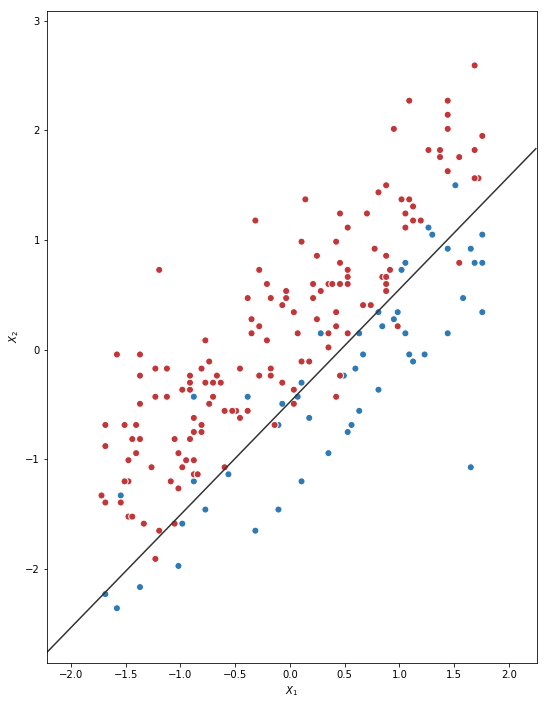

In [359]:
# 분류선 
f, ax = plt.subplots(figsize=(12,12))
ax.contour(xx, yy, probs, levels=[.5], cmap="Greys",
                      vmin=0, vmax=.6)
ax.scatter(X[:,1], X[:,2], c=T, s=50,
          cmap = "RdBu", vmin=-.2, vmax=1.2,
          edgecolor="white", linewidth=1)
ax.set(aspect="equal",
      xlim=(min(X[:,1]-.5), max(X[:,1])+.5), ylim=(min(X[:,2]-.5),max(X[:,2])+.5),
      xlabel="$X_1$", ylabel="$X_2$")

### 직접 구현을 한 rough한 GD이기 때문에 성능이 안좋을 수 있습니다
### 초기값에 매우 민감하며, 기타 하이퍼 파라미터에 따라 성능이 달라집니다